<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Housing-Sales/blob/master/Housing_Sales_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing Price Sales 

Peça a um comprador para descrever a casa dos seus sonhos, e eles provavelmente não começarão com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição de playgrounds prova que muito mais influencia as negociações de preços do que o número de quartos ou uma cerca branca.

Com 79 variáveis ​​explicativas que descrevem (quase) todos os aspectos de casas residenciais em Ames, Iowa, essa competição desafia você a prever o preço final de cada casa.


<br>

<p align=center>
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width="80%"></p>



<br>
<hr>

### Dicionário de dados 

Campos de dados
Aqui está uma versão resumida do que você encontrará no arquivo de descrição de dados.

* SalePrice - o preço de venda da propriedade em dólares. Essa é a variável de destino que você está tentando prever.
* MSSubClass : A classe de construção
* MSZoning : A classificação geral de zoneamento
* LotFrontage : pés lineares de rua conectados à propriedade
* LotArea : tamanho do lote em pés quadrados
* Rua : Tipo de acesso rodoviário
* Beco : Tipo de acesso ao beco
* LotShape : forma geral da propriedade
* LandContour : Planicidade da propriedade
* Utilitários : Tipo de utilitários disponíveis
* LotConfig : configuração do lote
* LandSlope : declive de propriedade
* Bairro : localizações físicas dentro dos limites da cidade de Ames
* Condição1 : Proximidade da estrada principal ou ferrovia
* Condição2 : Proximidade da estrada principal ou ferrovia (se houver um segundo)
* BldgType : Tipo de habitação
* HouseStyle : Estilo de habitação
* OverallQual : Qualidade geral do material e acabamento
* OverallCond : classificação geral das condições
* Yearbuilt : data de construção original
* YearRemodAdd : data de remodelação
* RoofStyle : Tipo de telhado
* RoofMatl : Material do telhado
* Exterior1st : revestimento exterior em casa
* Exterior2nd : Cobertura externa da casa (se houver mais de um material)
* MasVnrType : Tipo de folheado de alvenaria
* MasVnrArea : Área de folheado de alvenaria em pés quadrados
* ExterQual : Qualidade do material exterior
* ExterCond : Condição atual do material no exterior
* Fundação : Tipo de fundação
* BsmtQual : Altura do porão
* BsmtCond : Condição geral do porão
* Exposição : Paredes subterrâneas no nível da entrada ou do jardim
* BsmtFinType1 : Qualidade da área acabada do porão
* BsmtFinSF1 : pés quadrados com acabamento tipo 1
* BsmtFinType2 : Qualidade da segunda área finalizada (se presente)
* BsmtFinSF2 : Tipo 2 pés quadrados com acabamento
* BsmtUnfSF : pés quadrados inacabados da área do porão
* TotalBsmtSF : pés quadrados totais da área do porão
* Aquecimento : Tipo de aquecimento
* HeatingQC : Qualidade e condição do aquecimento
* CentralAir : ar condicionado central
* Elétrica : Sistema elétrico
* 1stFlrSF : Primeiro andar pés quadrados
* 2ndFlrSF : Segundo andar, pés quadrados
* LowQualFinSF : pés quadrados acabados de baixa qualidade (todos os pisos)
* GrLivArea : Área útil acima do nível do solo (pés quadrados)
* BsmtFullBath : banheiros completos no porão
* BsmtHalfBath : lavabos no porão
* FullBath : banheiros completos acima da série
* HalfBath : banhos de meia acima da série
* Quarto : Número de quartos acima do nível do porão
* Cozinha : Número de cozinhas
* KitchenQual : Qualidade da cozinha
* TotRmsAbvGrd : total de quartos acima da classe (não inclui banheiros)
* Funcional : classificação de funcionalidade doméstica
* Lareiras : Número de lareiras
* FireplaceQu : qualidade da lareira
* GarageType : Localização da garagem
* GarageYrBlt : ano em que a garagem foi construída
* GarageFinish : Acabamento interior da garagem
* GarageCars : tamanho da garagem em capacidade do carro
* GarageArea : tamanho da garagem em pés quadrados
* GarageQual : Qualidade da garagem
* GarageCond : Condição de garagem
* PavedDrive : Entrada de automóveis pavimentada
* WoodDeckSF : área de deck de madeira em pés quadrados
* OpenPorchSF : área de varanda aberta em pés quadrados
* EnclosedPorch : área de alpendre fechado em pés quadrados
* 3SsnPorch : Área da varanda de três estações em pés quadrados
* ScreenPorch : Área da varanda da tela em pés quadrados
* PoolArea : Área da piscina em pés quadrados
* PoolQC : Qualidade da piscina
* Cerca : qualidade da cerca
* MiscFeature : Recurso variado não coberto em outras categorias
* MiscVal : $ Valor do recurso diverso
* MoSold : Mês Vendido
* YrSold : Ano Vendido
* SaleType : Tipo de Venda
* Condição : Venda

<br>
<hr>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from hyperopt import hp, fmin, tpe, Trials
from skopt import gp_minimize
from skopt.plots import plot_convergence 



import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# dados treino 
path_train = '/content/drive/My Drive/Inteligência Artificial - Colab/Housing price /train.csv'
train = pd.read_csv(path_train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
# dados teste 
path_test = '/content/drive/My Drive/Inteligência Artificial - Colab/Housing price /test.csv'
test = pd.read_csv(path_test)

In [ ]:
# shape test 
test.shape

(1459, 80)

<hr>
<br>

### EDA 

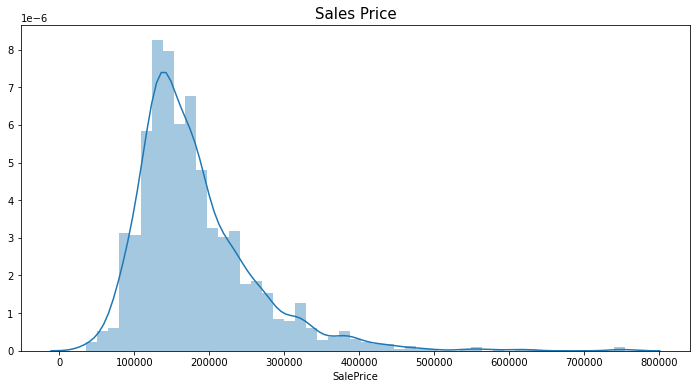

In [ ]:
# Distribuição SalePrice
plt.figure(figsize=(12,6))
plt.title('Sales Price', fontsize=15)
sns.distplot(train['SalePrice'])

In [ ]:
# valores acima de 400.000

sales_outliers = train.loc[train['SalePrice']> 400000]
len(sales_outliers)

28

In [ ]:
train['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [ ]:
# Feature GrLivArea 
train['GrLivArea'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64>

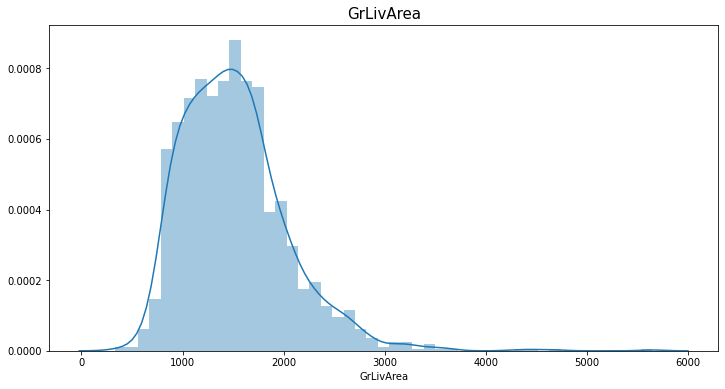

In [ ]:
# Distribuição GrLivArea

plt.figure(figsize=(12,6))
plt.title('GrLivArea', fontsize=15)
sns.distplot(train['GrLivArea'])

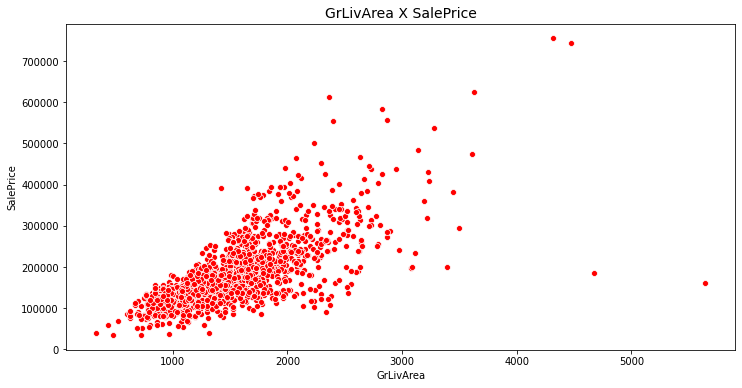

In [ ]:
# SalePrice x GrLivArea 

plt.figure(figsize=(12,6))
plt.title('GrLivArea X SalePrice', fontsize=14)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, color='red')

<br>
<hr>


### Feature Engineering 


In [ ]:
# Separar ID e SalePrice 

train_ID = train['Id']
test_ID = test['Id']

y_train = train['SalePrice'].values

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [ ]:
len(train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index))

1458

In [ ]:
def outliers_drop(data):

   # Quantidade Outliers 
    removidos = len(data[data['GrLivArea']>4000].index)
    print('Outliers removidos: {}'.format(removidos))

    # Excluindo Outliers 
    data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
  
    # plot
    print('\n') 
    plt.figure(figsize=(12,6))
    plt.title('Sem Outliers', fontsize=14)
    viz = sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, color='blue')

    return viz

Outliers removidos: 4




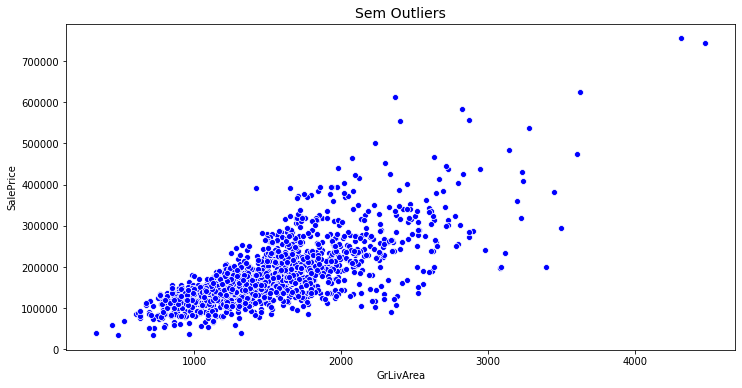

In [ ]:
# outliers removidos 
outliers_drop(train)

In [ ]:
# Concaternar datasets 
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2919, 79)

In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Feature Engineerging

<br>
<hr>

In [ ]:
all_data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [ ]:
def missing_values(data):

    """ identificar valores nulos 
         e sua quantidade   """

    # Total de nulos 
    total = data.isnull().sum()
    total = total.sort_values(ascending=False)

    # porcentagem de nulos 
    porcentagem = (data.isnull().sum() / len(data)*100)
    porcentagem = round(porcentagem, 2)

    # tabela de missing 
    table_missing = pd.concat([total, porcentagem], axis=1, keys=['Total NA', 'Porcentagem NA'])

    return table_missing

In [ ]:
missing_values(all_data)[:24]

,Total NA,Porcentagem NA
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


In [ ]:
# PoolQC
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# MiscFeatures
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

# Alley 
all_data["Alley"] = all_data["Alley"].fillna("None")

# Fence
all_data["Fence"] = all_data["Fence"].fillna("None")

# FireplaceQu
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [ ]:
# Impute missing 

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
# Sem dados nulos 
missing_values(all_data).sum()

Total NA          0.0
Porcentagem NA    0.0
dtype: float64

In [ ]:
# Transformando categóricas em Numéricas 

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Label encoder 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [ ]:
print("Existem {} features numéricas inclinadas para transformar Box Cox".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

Existem 58 features numéricas inclinadas para transformar Box Cox


In [ ]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 220)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

<hr>
<br>


#### Modelos regressores 


In [ ]:
# RMSE + Cross validation 

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
# Lasso 
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
# ElasticNet 
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
# Gradient Boosting 
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=42)

In [ ]:
# XGboost 
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
# LightGBM 
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 34029.4692 (4622.3935)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 33800.6737 (4538.2851)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 27349.7114 (5522.7866)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 25941.4088 (3574.5727)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 27157.3822 (4374.3969)



<hr>
<br>

### Conclusão 

Todo o pipeline desenvolvido, foi construído para reduzir o erro através do Feature engineering apliquei transformação de box-cox com o Scipy, em uma tentativa de reduzir a variancia, testei alguns algoritmos para comparar o erro dos modelos, os modelos baseados em árvore tiveram um desempenho melhor que modelos lineares, pela fator da alta dimensionalidade, os modelos lineares sofreram um pouco mais, outra abordagem plausível a ser aplicada são técnica de Feature selection para reduzir a complexidade, a solução final seria criar um <b> Stacking </b> de regressores e minimizar o RMSE. 


<br><hr>
<hr>